
# Notes

## Impedance matching and Single-Gain Stage Characterization
- All sweeps are performed with 0.5 GHz - 1.5 GHz range
- Calibration is performed taking into account 2 coax cables used for measurement


### Check 1
- Before measuring
	- Remove the 1 pF input capacitor (Z12), replace with soldering bridge.
	- Add a 1.8 pF input capacitor instead of Z16 (for DC blocking purposes).
	- Remove the 1 pF output capacitor (Z9), replace with soldering bridge.

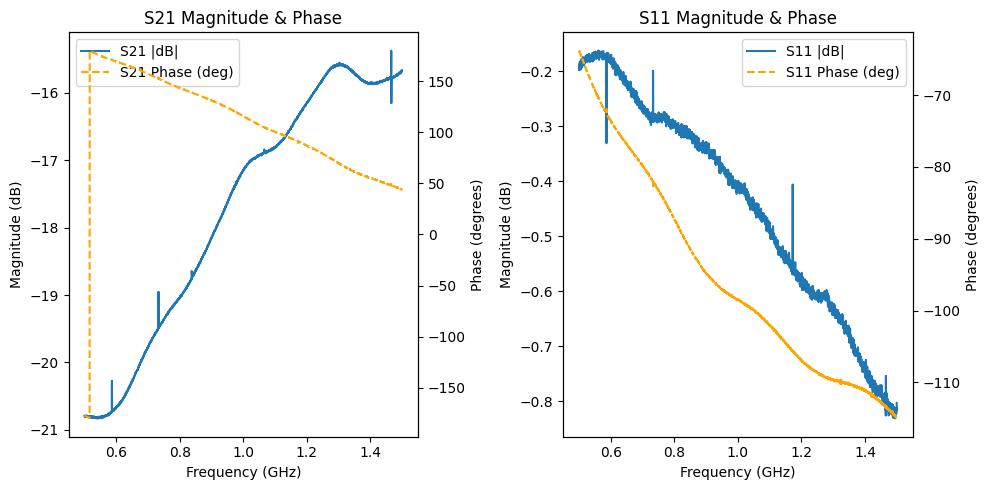

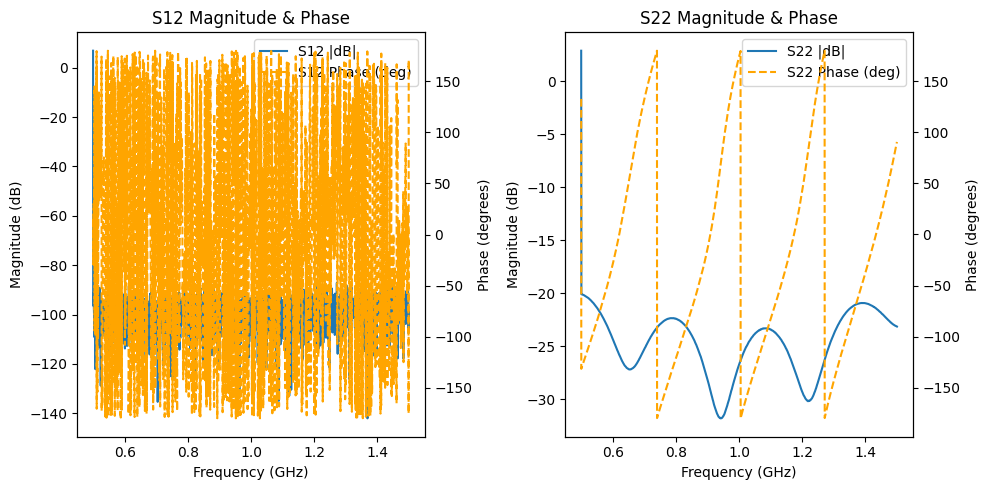

In [4]:
import sys
sys.path.insert(0,'../python_libs')
from rf_plots import show_plot


# Load the S-parameter file (Touchstone format).
# Adjust the path/filename as needed:
filename = "data/double_coax_calib_S11_S21_v0.s2p"
show_plot(filename, title_through="S21", title_ret = "S11")
filename = "data/double_coax_calib_S22_S12_v0.s2p"
show_plot(filename, title_through="S12", title_ret = "S22")

### Observation
- It seems like there is no gain whatsoever.
	- perhaps an open circuit got introduced somewhere? Or maybe the transistor is not operating in its linear region?
### Checking DC Operating point
- Check whether transistors are operating in linear mode
	- Vb is smaller than Vc for every case, so the transistor isn't in saturation.

In [5]:
### Checking DC Operating point (U3)
DC_VBase_U3 = 1.12  		#! SIM VALUE: 1.23 V
DC_VEmitter_U3 = 0.68		#! SIM VALUE: 0.436 V
DC_VCollector_U3 = 2.04		#! SIM VALUE: 3.15 V
DC_IEmitter_U3 = DC_VCollector_U3 / 47

print(f"VBE - U3 {DC_VBase_U3-DC_VEmitter_U3:.2f} V")
print(f"VCE - U3 {DC_VCollector_U3-DC_VEmitter_U3:.2f} V")
print(f"IE  - U3 {DC_IEmitter_U3*1000:.2f} mA")

VBE - U3 0.44 V
VCE - U3 1.36 V
IE  - U3 43.40 mA


### Next steps
- Take a new board, simply put a soldering bridge instead Z16 and check if there's any gain.
	- If there is something is probably wrong with your previous soldering
	- If there isn't then there might be something wrong your biasing circuit.
	- See if there's a way to avoid soldering issues.